## 0. Import libraries

In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import aux_functions as f
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as st
import scipy.stats as stats

## 0.1 Read data

In [108]:
df = pd.read_csv("data/df_clean_all.csv", index_col = None)
df = df.reset_index(drop=True)
df = df.drop(columns='Unnamed: 0')
df['date_time'] = pd.to_datetime(df['date_time'])
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317119,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
317120,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
317121,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [109]:
df.dtypes

client_id                      int64
clnt_tenure_yr               float64
clnt_tenure_mnth             float64
clnt_age                     float64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                 float64
logons_6_mnth                float64
generation                    object
testing_engagement            object
balance_level                 object
tenure                        object
Variation                     object
visitor_id                    object
visit_id                      object
process_step                  object
date_time             datetime64[ns]
dtype: object

## **Day 1**

1. Who are the primary clients using this online process?
2. Are the primary clients younger or older, new or long-standing?

In [110]:
df_control = df[df['Variation']== 'Control']
df_test = df[df['Variation']== 'Test']

### 1. Who are the primary clients using this online process? 

In [111]:
frequency_table_control, proportion_table_control, frequency_table_test, proportion_table_test = f.create_frequency_table(df_control, df_test, 'gendr')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\270614438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\270614438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");


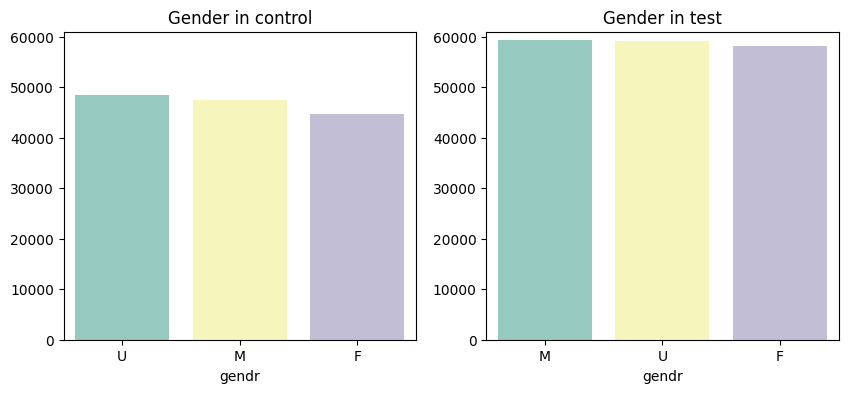

In [112]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in test')
plt.show()

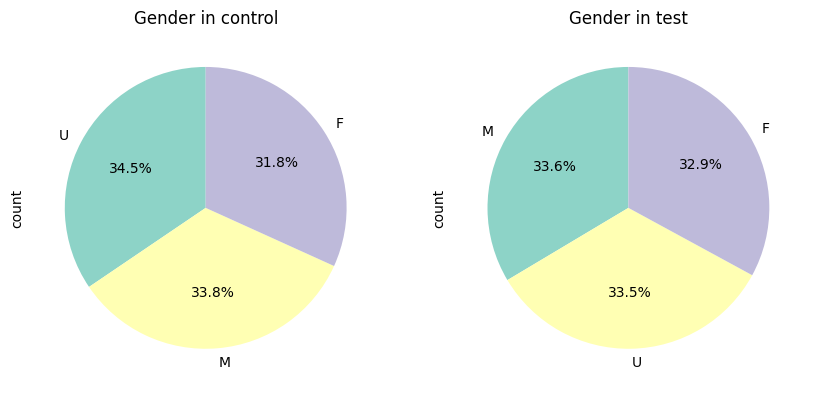

In [113]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Gender in control')
plt.subplot(1,2,2)
frequency_table_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Gender in test')
plt.show()

In [114]:
frequency_table_generation_control, proportion_table_generation_control, frequency_table_generation_test, proportion_table_generation_test = f.create_frequency_table(df_control, df_test, 'generation')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\3191112310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\3191112310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");


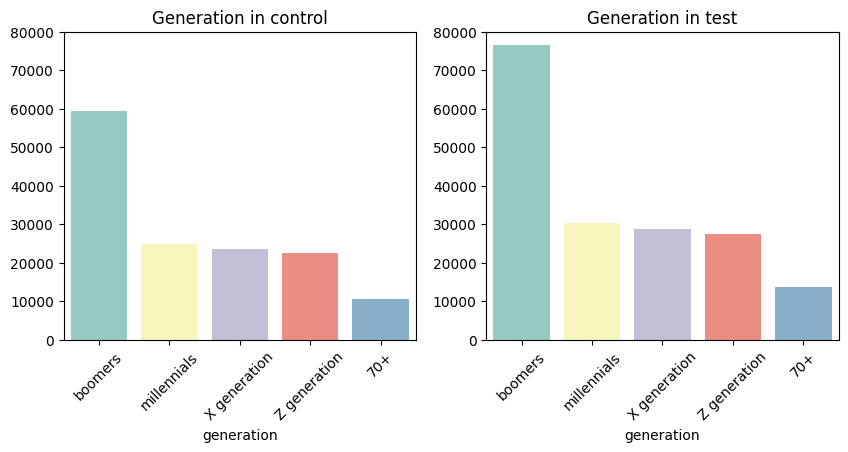

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in test')
plt.show()

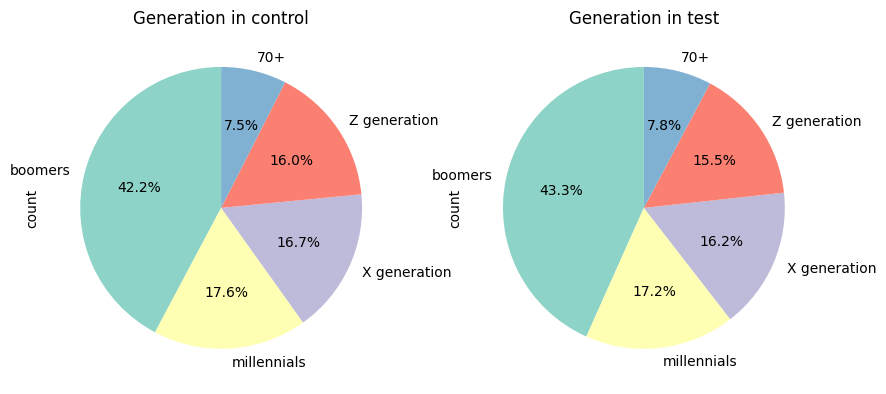

In [115]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_generation_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in control')
plt.subplot(1,2,2)
frequency_table_generation_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in test')
plt.show()

In [116]:
df_control.shape[0], df_test.shape[0]

(140482, 176641)

### 2. Are the primary clients younger or older, new or long-standing? 

In [117]:
frequency_table_tenure_control, proportion_table_tenure_control, frequency_table_tenure_test, proportion_table_tenure_test = f.create_frequency_table(df_control, df_test, 'tenure')

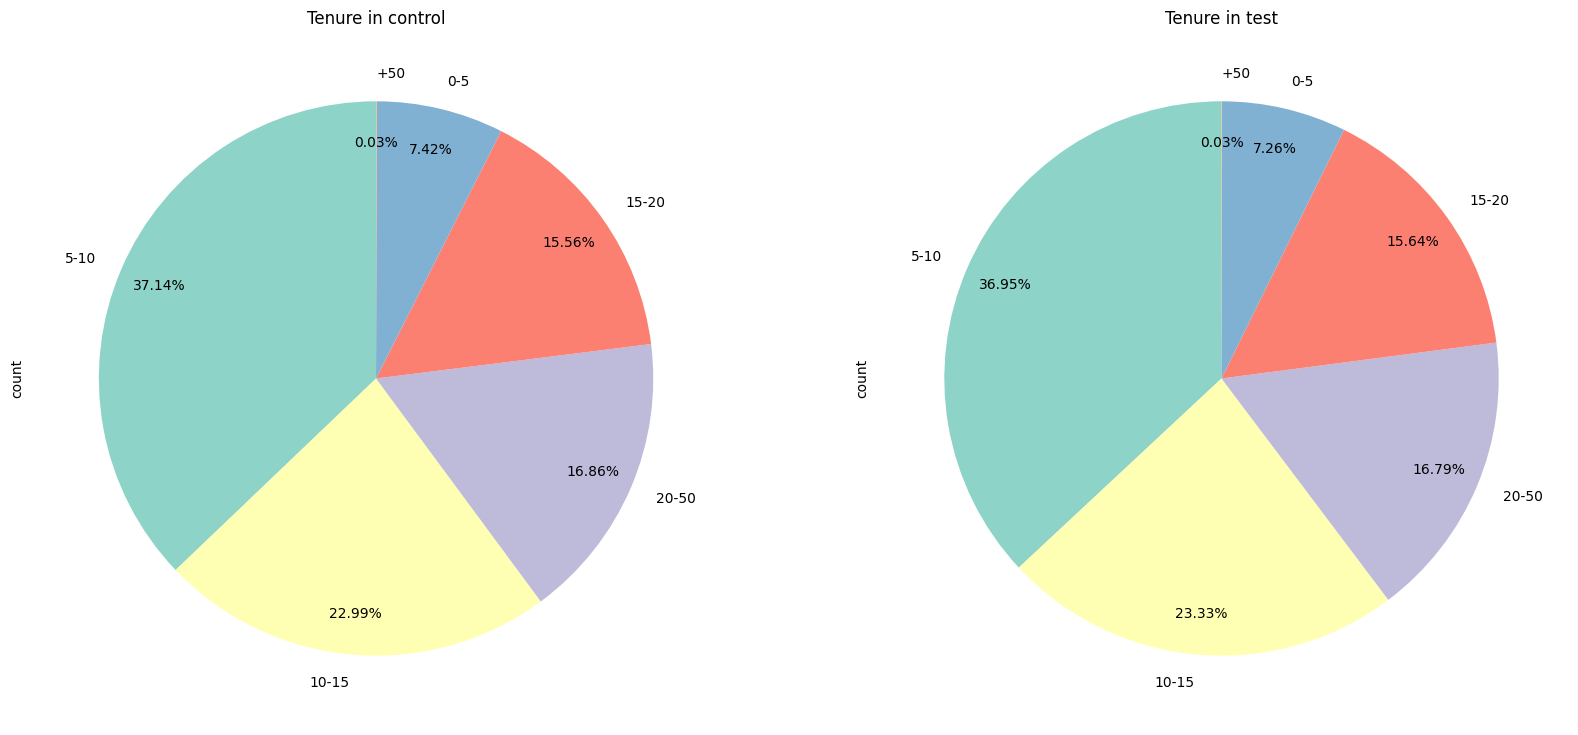

In [118]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_tenure_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Tenure in control')
plt.subplot(1,2,2)
frequency_table_tenure_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Tenure in test')
plt.show()

In [119]:
frequency_table_balance_level_control, proportion_table_balance_level_control, frequency_table_balance_level_test, proportion_table_balance_level_test = f.create_frequency_table(df_control, df_test, 'balance_level')

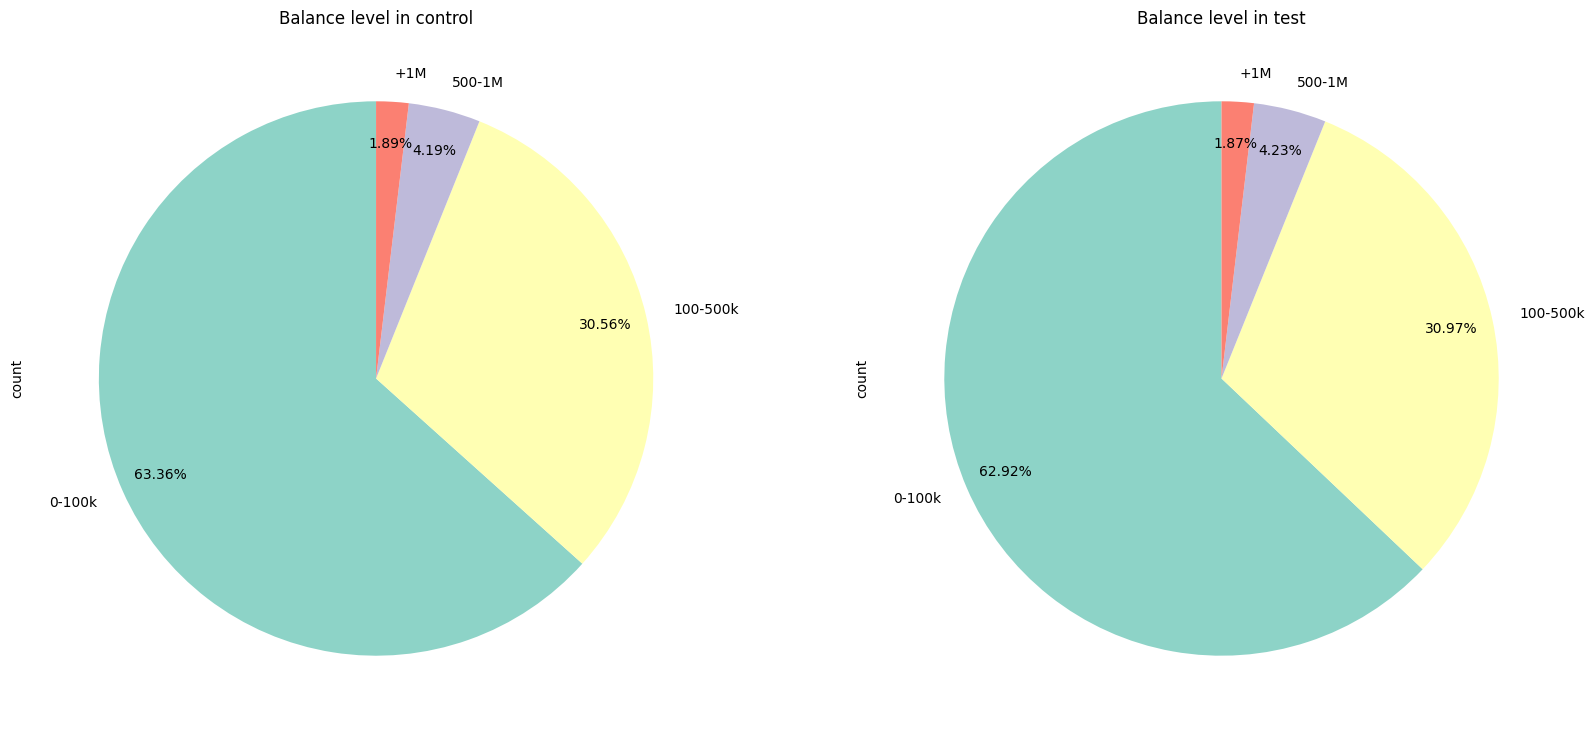

In [15]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_balance_level_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Balance level in control')
plt.subplot(1,2,2)
frequency_table_balance_level_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Balance level in test')
plt.show()

#### Review there aren't any clients in control and test at the same time

In [ ]:
clientes_control = df_control['client_id'].tolist()
clientes_test = df_test['client_id'].tolist()

both_experiments = []

for i in clientes_control:
    if i in clientes_test: 
        both_experiments.append(i)

In [ ]:
both_experiments

## **Day 3**: KPIs

1. **Completation Rate:** The proportion of users who reach the final *confirm* step
2. **Time Spent on Each Step**: The average duration users spend on each step.
3. **Error Rates**: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [120]:
step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df['step_order'] = df['process_step'].map(step_order)

In [121]:
df = df.sort_values(by=['visit_id', 'step_order'])
df[['client_id', 'visit_id', 'process_step', 'date_time']]

,client_id,visit_id,process_step,date_time
300409,3561384,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
300410,3561384,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
76848,7338123,100019538_17884295066_43909,start,2017-04-09 16:21:59
76849,7338123,100019538_17884295066_43909,start,2017-04-09 16:21:45
76854,7338123,100019538_17884295066_43909,start,2017-04-09 16:20:56
...,...,...,...,...
196186,6627522,999988789_76411676596_272843,start,2017-04-21 23:51:09
196190,6627522,999988789_76411676596_272843,start,2017-04-21 23:49:11
196187,6627522,999988789_76411676596_272843,step_1,2017-04-21 23:51:00
196189,6627522,999988789_76411676596_272843,step_1,2017-04-21 23:49:22


In [122]:
df_test = df[df['Variation'] == 'Test']
df_test = df_test.sort_values(by=['visit_id', 'step_order'])
df_control = df[df['Variation'] == 'Control']
df_control = df_control.sort_values(by=['visit_id', 'step_order'])

In [123]:
df_test_no_repetition = f.no_repetition(df_test)
df_control_no_repetition = f.no_repetition(df_control)

In [124]:
completation_rate_test_no_rep = f.step_rate(df_test_no_repetition, 'confirm')
completation_rate_test_no_rep

69.21

In [21]:
# Test completion rate for test group
df_test[df_test["process_step"] == "confirm"]
df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")
df_test
df_test_no_repetition = df_test[df_test['repetition'] == False]
df_test_no_repetition
df_test_confirm = df_test_no_repetition[df_test_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

69.1

In [22]:
completation_rate_control_no_rep = f.step_rate(df_control_no_repetition, 'confirm')
completation_rate_control_no_rep

65.51

In [23]:
# Test completion rate for test group
df_control[df_control["process_step"] == "confirm"]
df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")
df_control
df_control_no_repetition = df_control[df_control['repetition'] == False]
df_control_no_repetition
df_control_confirm = df_control_no_repetition[df_control_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

65.4

### 2. Time Spent on Each Step: The average duration users spend on each step

In [125]:
df_control_no_repetition[['client_id', 'visit_id', 'process_step', 'date_time']].sort_values(by=['visit_id', 'date_time', 'client_id'])

,client_id,visit_id,process_step,date_time
148115,105007,100030127_47967100085_936361,start,2017-03-22 11:07:49
226761,5623007,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
226760,5623007,100037962_47432393712_705583,start,2017-04-14 16:44:03
136962,4823947,100057941_88477660212_944512,start,2017-04-09 11:30:10
136958,4823947,100057941_88477660212_944512,step_1,2017-04-09 11:33:21
...,...,...,...,...
96143,4064969,999985675_64610694964_443659,start,2017-04-20 09:45:18
96142,4064969,999985675_64610694964_443659,step_1,2017-04-20 09:46:26
96141,4064969,999985675_64610694964_443659,step_2,2017-04-20 09:47:04
96140,4064969,999985675_64610694964_443659,step_3,2017-04-20 09:48:45


In [126]:
df_control_no_repetition.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'generation',
       'testing_engagement', 'balance_level', 'tenure', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time', 'step_order'],
      dtype='object')

In [127]:
df_control_no_repetition[['client_id', 'visit_id', 'process_step', 'date_time']]

,client_id,visit_id,process_step,date_time
148115,105007,100030127_47967100085_936361,start,2017-03-22 11:07:49
226760,5623007,100037962_47432393712_705583,start,2017-04-14 16:44:03
226761,5623007,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
136962,4823947,100057941_88477660212_944512,start,2017-04-09 11:30:10
136958,4823947,100057941_88477660212_944512,step_1,2017-04-09 11:33:21
...,...,...,...,...
96143,4064969,999985675_64610694964_443659,start,2017-04-20 09:45:18
96142,4064969,999985675_64610694964_443659,step_1,2017-04-20 09:46:26
96141,4064969,999985675_64610694964_443659,step_2,2017-04-20 09:47:04
96140,4064969,999985675_64610694964_443659,step_3,2017-04-20 09:48:45


In [128]:
df_control_tiempo = f.time_spent_each_step(df_control_no_repetition)
df_control_tiempo[['client_id', 'visit_id', 'process_step', 'date_time', 'time_spent']]
df_control_tiempo = df_control_tiempo.sort_values(by=['visit_id', 'date_time', 'process_step'])
#df_control_tiempo['time_spent'] = df_control_tiempo.groupby(by = 'visit_id')['time_spent'].shift(-1)
df_control_tiempo[['client_id', 'visit_id', 'process_step', 'date_time', 'time_spent']]

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['step_order'] = df['process_step'].map(step_order)


,client_id,visit_id,process_step,date_time,time_spent
148115,105007,100030127_47967100085_936361,start,2017-03-22 11:07:49,NaT
226761,5623007,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,NaT
226760,5623007,100037962_47432393712_705583,start,2017-04-14 16:44:03,NaT
136962,4823947,100057941_88477660212_944512,start,2017-04-09 11:30:10,0 days 00:03:11
136958,4823947,100057941_88477660212_944512,step_1,2017-04-09 11:33:21,0 days 00:00:37
...,...,...,...,...,...
96143,4064969,999985675_64610694964_443659,start,2017-04-20 09:45:18,0 days 00:01:08
96142,4064969,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,0 days 00:00:38
96141,4064969,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,0 days 00:01:41
96140,4064969,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,0 days 00:14:03


In [129]:
df_control_tiempo['time_in_second'] = df_control_tiempo['time_spent'].dt.total_seconds()

In [130]:
visit_id_eliminar = df_control_tiempo[df_control_tiempo['time_in_second'] < 0]['visit_id'].tolist()

In [132]:
df_control_tiempo[df_control_tiempo['time_in_second'] < 0]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,step_order,time_spent,time_in_second
207627,843228,6.0,74.0,52.5,U,2,62433.62,4.0,7.0,boomers,...,0-100k,5-10,Control,906864133_66428944096,153139550_16224196740_395856,start,2017-04-02 13:15:46,0,-1 days +22:41:14,-4726.0
61991,8273350,10.0,124.0,56.0,F,2,64732.62,6.0,9.0,boomers,...,0-100k,10-15,Control,711208998_14643001925,239772611_20856876937_901897,start,2017-04-17 00:50:33,0,-1 days +23:48:10,-710.0
201395,4605889,9.0,119.0,37.0,F,3,118959.60,2.0,5.0,millennials,...,100-500k,5-10,Control,669766537_59670563782,367343727_41834214381_263926,step_3,2017-04-05 20:01:04,3,-1 days +23:42:44,-1036.0
223611,221354,12.0,151.0,66.5,F,2,59874.96,6.0,9.0,boomers,...,0-100k,10-15,Control,307143235_51914923330,488955589_98373179787_760227,confirm,2017-04-07 10:11:12,4,-1 days +23:44:49,-911.0
107451,965266,16.0,195.0,57.0,F,2,23884.45,1.0,4.0,boomers,...,0-100k,15-20,Control,812044401_90898613282,591661044_86442933511_82748,step_3,2017-04-05 19:44:12,3,-1 days +23:48:19,-701.0


In [131]:
visit_id_eliminar

['153139550_16224196740_395856',
 '239772611_20856876937_901897',
 '367343727_41834214381_263926',
 '488955589_98373179787_760227',
 '591661044_86442933511_82748']

In [133]:
df_control_tiempo = df_control_tiempo[~df_control_tiempo['visit_id'].isin(visit_id_eliminar)]

In [134]:
df_control_tiempo[df_control_tiempo['time_in_second'] < 0]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,step_order,time_spent,time_in_second


In [135]:
visit_id_eliminar = df_control_tiempo[(df_control_tiempo['process_step'] == 'confirm')& (df_control_tiempo['time_in_second'] > 0 )]['visit_id'].tolist()

In [137]:
visit_id_eliminar

['618506607_88795084100_9189', '697547479_43262426398_97347']

In [138]:
df_control_tiempo = df_control_tiempo[~df_control_tiempo['visit_id'].isin(visit_id_eliminar)]

In [139]:
avg_time_per_step_control = df_control_tiempo.groupby('process_step')['time_spent'].mean()
avg_time_per_step_control

process_step
confirm                         NaT
start     0 days 00:00:55.957085320
step_1    0 days 00:00:54.230567685
step_2    0 days 00:01:40.164446178
step_3    0 days 00:02:16.969689017
Name: time_spent, dtype: timedelta64[ns]

In [140]:
avg_time_per_step_control_second = df_control_tiempo.groupby('process_step')['time_in_second'].mean()
avg_time_per_step_control_second

process_step
confirm           NaN
start       55.957085
step_1      54.230568
step_2     100.164446
step_3     136.969689
Name: time_in_second, dtype: float64

In [141]:
df_avg_second_control = pd.DataFrame(avg_time_per_step_control_second).reset_index()
df_avg_second_control = df_avg_second_control[df_avg_second_control['process_step']!='confirm']
df_avg_second_control

,process_step,time_in_second
1,start,55.957085
2,step_1,54.230568
3,step_2,100.164446
4,step_3,136.969689


In [142]:
df_test_no_repetition[['client_id', 'visit_id', 'process_step', 'date_time']].sort_values(by=['visit_id', 'date_time', 'client_id'])

,client_id,visit_id,process_step,date_time
300409,3561384,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
76848,7338123,100019538_17884295066_43909,start,2017-04-09 16:21:59
76847,7338123,100019538_17884295066_43909,step_1,2017-04-09 16:22:04
76846,7338123,100019538_17884295066_43909,step_2,2017-04-09 16:22:08
76845,7338123,100019538_17884295066_43909,step_3,2017-04-09 16:24:01
...,...,...,...,...
304104,829911,999984454_18731538378_781808,step_3,2017-03-29 11:20:23
304103,829911,999984454_18731538378_781808,confirm,2017-03-29 11:21:07
196188,6627522,999988789_76411676596_272843,step_2,2017-04-21 23:50:16
196187,6627522,999988789_76411676596_272843,step_1,2017-04-21 23:51:00


In [143]:
df_test_tiempo = f.time_spent_each_step(df_test_no_repetition)
df_test_tiempo[['client_id', 'visit_id', 'process_step', 'time_spent']]

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['step_order'] = df['process_step'].map(step_order)


,client_id,visit_id,process_step,time_spent
252082,555,637149525_38041617439_716659,start,0 days 00:00:07
252081,555,637149525_38041617439_716659,step_1,0 days 00:00:32
252080,555,637149525_38041617439_716659,step_2,0 days 00:01:39
252079,555,637149525_38041617439_716659,step_3,0 days 00:00:20
252078,555,637149525_38041617439_716659,confirm,NaT
...,...,...,...,...
306138,9999729,870243567_56915814033_814203,confirm,NaT
306133,9999729,99583652_41711450505_426179,start,0 days 00:00:15
306132,9999729,99583652_41711450505_426179,step_1,NaT
50558,9999832,472154369_16714624241_585315,start,0 days 00:00:08


In [144]:
df_test_tiempo['time_in_second'] = df_test_tiempo['time_spent'].dt.total_seconds()

In [145]:

visit_id_eliminar = df_test_tiempo[df_test_tiempo['time_in_second'] < 0]['visit_id'].tolist()
df_test_tiempo = df_test_tiempo[~df_test_tiempo['visit_id'].isin(visit_id_eliminar)]
df_test_tiempo[df_test_tiempo['time_in_second'] < 0]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,step_order,time_spent,time_in_second


In [146]:
visit_id_eliminar = df_test_tiempo[(df_test_tiempo['process_step'] == 'confirm')& (df_test_tiempo['time_in_second'] > 0 )]['visit_id'].tolist()
df_test_tiempo = df_test_tiempo[~df_test_tiempo['visit_id'].isin(visit_id_eliminar)]
df_test_tiempo[(df_test_tiempo['process_step'] == 'confirm')& (df_test_tiempo['time_in_second'] > 0 )]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,step_order,time_spent,time_in_second


In [147]:
avg_time_per_step_test = f.mean_time_spent(df_test_tiempo)
avg_time_per_step_test

process_step
confirm                         NaT
start     0 days 00:00:47.075808432
step_1    0 days 00:00:53.999915633
step_2    0 days 00:01:42.246235606
step_3    0 days 00:02:21.534097108
Name: time_spent, dtype: timedelta64[ns]

In [148]:
avg_time_per_step_test_second = df_test_tiempo.groupby('process_step')['time_in_second'].mean()
avg_time_per_step_test_second

process_step
confirm           NaN
start       47.075808
step_1      53.999916
step_2     102.246236
step_3     141.534097
Name: time_in_second, dtype: float64

In [45]:
df_avg_second_test = pd.DataFrame(avg_time_per_step_test_second).reset_index()
df_avg_second_test = df_avg_second_test[df_avg_second_test['process_step']!='confirm']
df_avg_second_test

,process_step,time_in_second
1,start,52.280573
2,step_1,74.009141
3,step_2,108.310231
4,step_3,145.599825


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\4142769933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_in_second', data=df_avg_second_control, palette='viridis')
C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\4142769933.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_in_second', data=df_avg_second_test, palette='viridis')


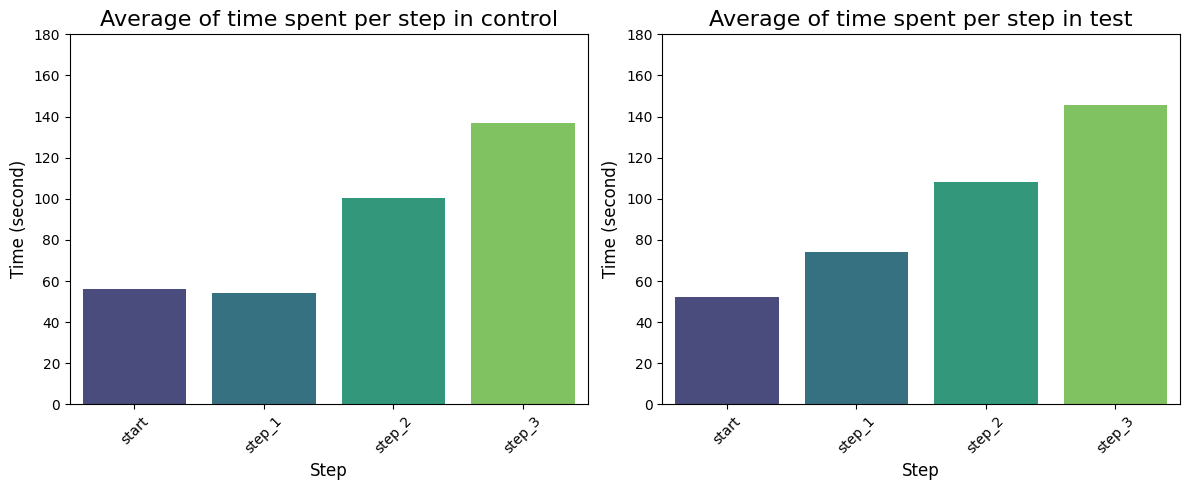

In [149]:



plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.barplot(x='process_step', y='time_in_second', data=df_avg_second_control, palette='viridis')

plt.title('Average of time spent per step in control', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Time (second)', fontsize=12)
plt.ylim([0,180])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='process_step', y='time_in_second', data=df_avg_second_test, palette='viridis')
plt.ylim([0,180])
plt.title('Average of time spent per step in test', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Time (second)', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()

plt.show()

In [47]:
df_avg_second_control['time_in_second'].mean(), df_avg_second_test['time_in_second'].mean()

(np.float64(97.28895818830637), np.float64(95.0499427386151))

### 3. **Error Rates:** If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [150]:
df_control = df_control.sort_values(by=['client_id', 'visit_id', 'date_time'])
df_control[['client_id', 'visit_id', 'process_step', 'date_time']]
df_test = df_test.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [151]:
df_control_error = f.transform_to_errores(df_control)
percentage_error_control = f.percentage_errors(df_control_error)
percentage_error_control

Percentage of errors : 6.7830754117965295


np.float64(6.7830754117965295)

In [152]:
df_test_error = f.transform_to_errores(df_test)
percentage_error_test = f.percentage_errors(df_test_error)
percentage_error_test

Percentage of errors : 9.192090171590966


np.float64(9.192090171590966)

##### 3.1 Error rate per category
1. Gender 
2. Generation
3. Testing_engagement 
4. Balance level
5. Tenure


Error rate per generation: generation
70+             0.081633
X generation    0.064214
Z generation    0.065727
boomers         0.071474
millennials     0.058565
Name: is_error, dtype: float64
Error rate per generation: generation
70+             0.125027
X generation    0.081533
Z generation    0.072435
boomers         0.105574
millennials     0.069935
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


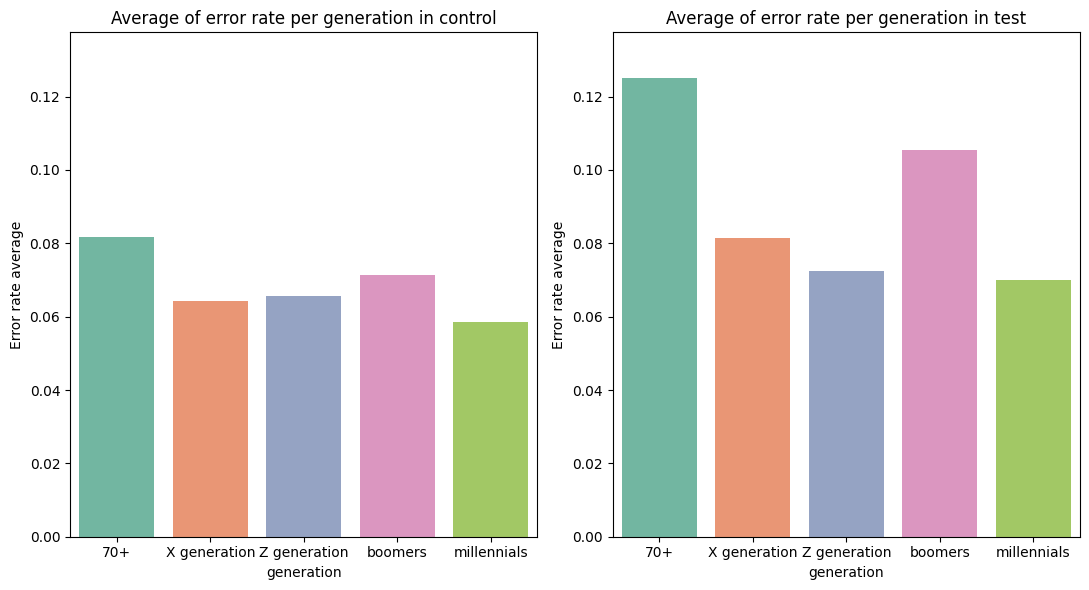

Error rate per testing_engagement: testing_engagement
high    0.060945
low     0.067870
Name: is_error, dtype: float64
Error rate per testing_engagement: testing_engagement
high    0.066127
low     0.092030
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


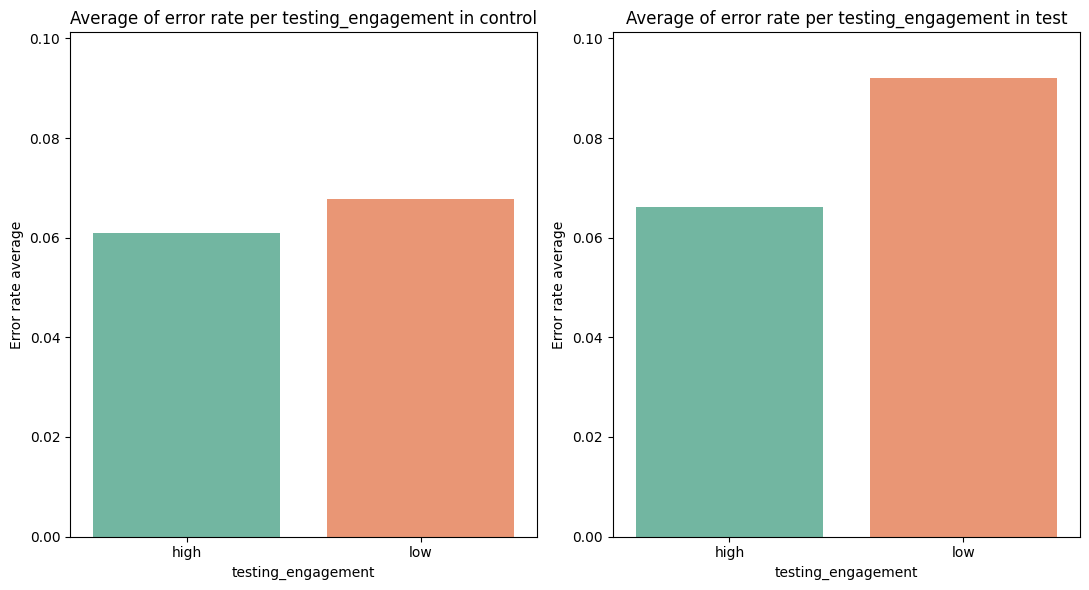

Error rate per balance_level: balance_level
+1M         0.064431
0-100k      0.066761
100-500k    0.069690
500-1M      0.071974
Name: is_error, dtype: float64
Error rate per balance_level: balance_level
+1M         0.092145
0-100k      0.089232
100-500k    0.096887
500-1M      0.095448
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


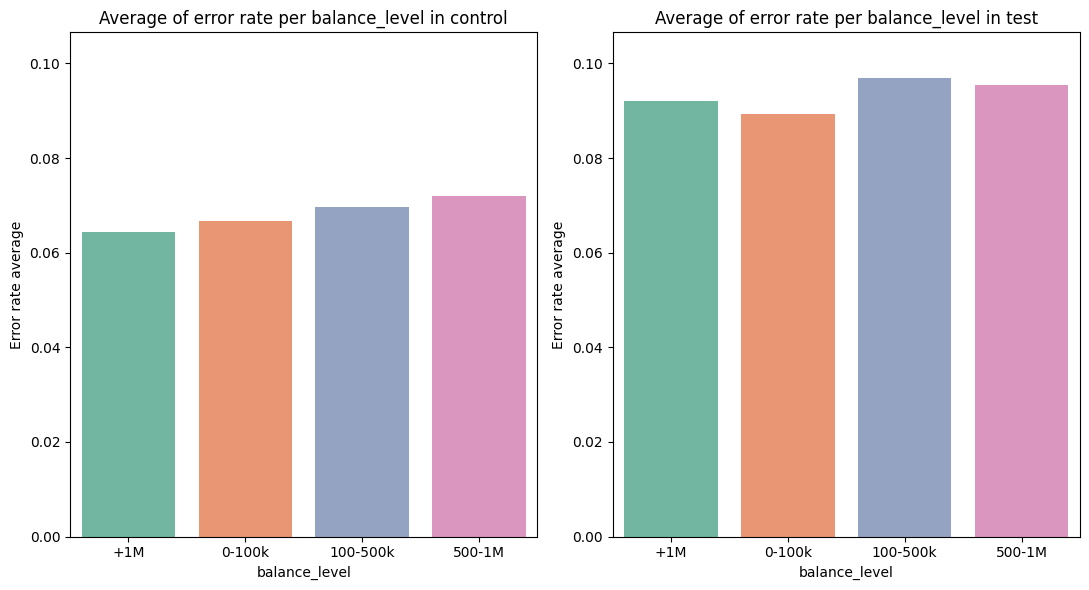

Error rate per tenure: tenure
+50      0.127660
0-5      0.069475
10-15    0.064313
15-20    0.065682
20-50    0.069878
5-10     0.069597
Name: is_error, dtype: float64
Error rate per tenure: tenure
+50      0.061224
0-5      0.086797
10-15    0.092769
15-20    0.096551
20-50    0.098105
5-10     0.087644
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


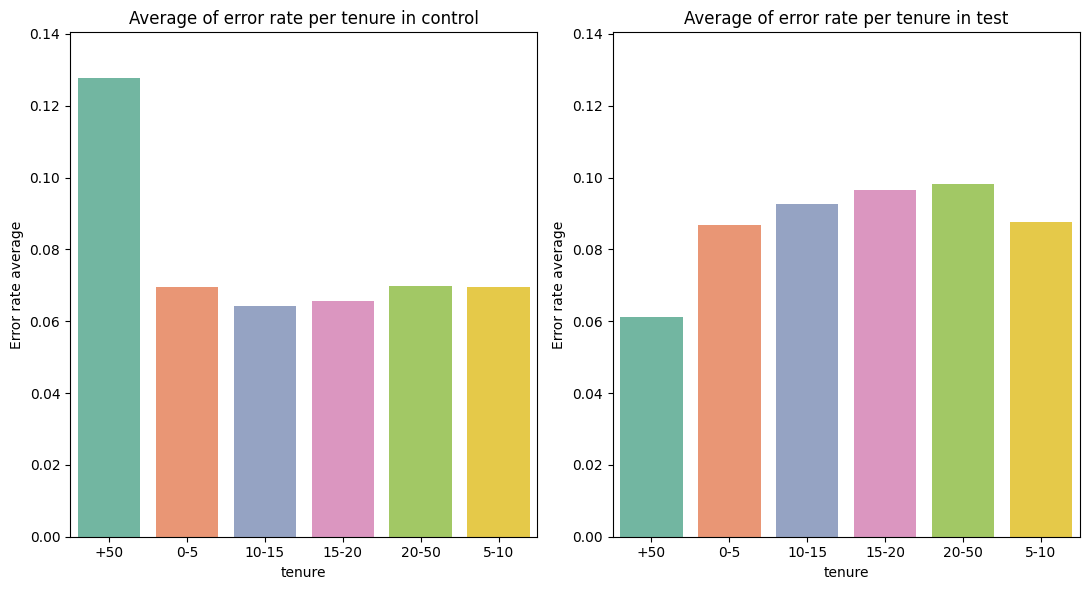

In [153]:
list_category = ['generation','testing_engagement', 'balance_level', 'tenure']
for i in list_category:
    avg_control = f.mean_errors_per_category(df_control_error, i)
    avg_test = f.mean_errors_per_category(df_test_error, i)
    
    f.create_barplot_error(avg_control, avg_test, i)

estudiar edad vs tenure, ver porcentajes de +50 (porcentaje)

#### 2.1 Average of time spent per step without errors

In [154]:
df_control_no_repetition['process_step'].unique()

array(['start', 'step_1', 'step_2', 'step_3', 'confirm'], dtype=object)

In [155]:
df_control_error_no_rep = f.transform_to_errores(df_control_no_repetition)
df_test_error_no_rep = f.transform_to_errores(df_test_no_repetition)

In [156]:
df_control_error_no_rep['process_step'].unique()

array(['start', 'step_3', 'step_2', 'step_1', 'confirm'], dtype=object)

In [157]:
df_valid_control = f.without_error(df_control_error_no_rep)
df_valid_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,step_order,previous_step_order,is_error
130633,1104,5.0,66.0,48.0,U,3,154643.94,6.0,9.0,X generation,...,100-500k,5-10,Control,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,0,NaN,False
130634,1104,5.0,66.0,48.0,U,3,154643.94,6.0,9.0,X generation,...,100-500k,5-10,Control,194240915_18158000533,643221571_99977972121_69283,start,2017-06-20 22:31:33,0,NaN,False
281169,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,0-100k,5-10,Control,446844663_31615102958,507052512_11309370126_442139,start,2017-04-08 15:59:16,0,NaN,False
281168,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,0-100k,5-10,Control,446844663_31615102958,795373564_99931517312_810896,start,2017-04-08 18:05:02,0,NaN,False
281167,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,0-100k,5-10,Control,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141083,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_1,2017-03-29 15:29:55,1,0.0,False
141082,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_2,2017-03-29 15:30:11,2,1.0,False
141079,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,3,2.0,False
141080,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,100-500k,+50,Control,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,4,3.0,False


In [158]:
df_valid_control['process_step'].unique()

array(['start', 'step_1', 'step_2', 'step_3', 'confirm'], dtype=object)

In [159]:
df_valid_test = f.without_error(df_test_error_no_rep)
df_valid_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,step_order,previous_step_order,is_error
252082,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,0,NaN,False
252081,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,1,0.0,False
252080,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2,1.0,False
252079,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3,2.0,False
252078,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,4,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306138,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,100-500k,10-15,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,4,3.0,False
306133,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,100-500k,10-15,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,0,NaN,False
306132,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,100-500k,10-15,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,1,0.0,False
50558,9999832,23.0,281.0,49.0,F,2,431887.61,1.0,4.0,X generation,...,100-500k,20-50,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,0,NaN,False


In [160]:
df_valid_control_time = f.time_spent_each_step(df_valid_control)
time_spent_control = f.mean_time_spent(df_valid_control_time)
df_time_spent_control = pd.DataFrame(time_spent_control).reset_index()
df_time_spent_control = df_time_spent_control[df_time_spent_control['process_step']!='confirm']
#df_time_spent_control['process_step'] = df_time_spent_control['process_step'].replace({'step_1': 'start', 'step_2': 'step_1', 'step_3':'step_2', 'confirm':'step_3'})
df_time_spent_control = df_time_spent_control.sort_values(by='process_step')
df_time_spent_control

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['step_order'] = df['process_step'].map(step_order)


,process_step,time_spent
1,start,0 days 00:00:54.848932436
2,step_1,0 days 00:00:52.164130678
3,step_2,0 days 00:01:38.504277108
4,step_3,0 days 00:02:16.627123268


In [161]:
df_valid_test_time = f.time_spent_each_step(df_valid_test)
time_spent_test = f.mean_time_spent(df_valid_test_time)
df_time_spent_test = pd.DataFrame(time_spent_test).reset_index()
df_time_spent_test = df_time_spent_test[df_time_spent_test['process_step']!='confirm']
#df_time_spent_test['process_step'] = df_time_spent_test['process_step'].replace({'step_1': 'start', 'step_2': 'step_1', 'step_3':'step_2', 'confirm':'step_3'})
df_time_spent_test = df_time_spent_test.sort_values(by='process_step')
df_time_spent_test

c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['step_order'] = df['process_step'].map(step_order)


,process_step,time_spent
1,start,0 days 00:00:45.711618981
2,step_1,0 days 00:00:48.816150700
3,step_2,0 days 00:01:39.518187881
4,step_3,0 days 00:02:19.601168614


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\2129171798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_control, palette='viridis')
C:\Users\Carlota\AppData\Local\Temp\ipykernel_21036\2129171798.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_test, palette='viridis')


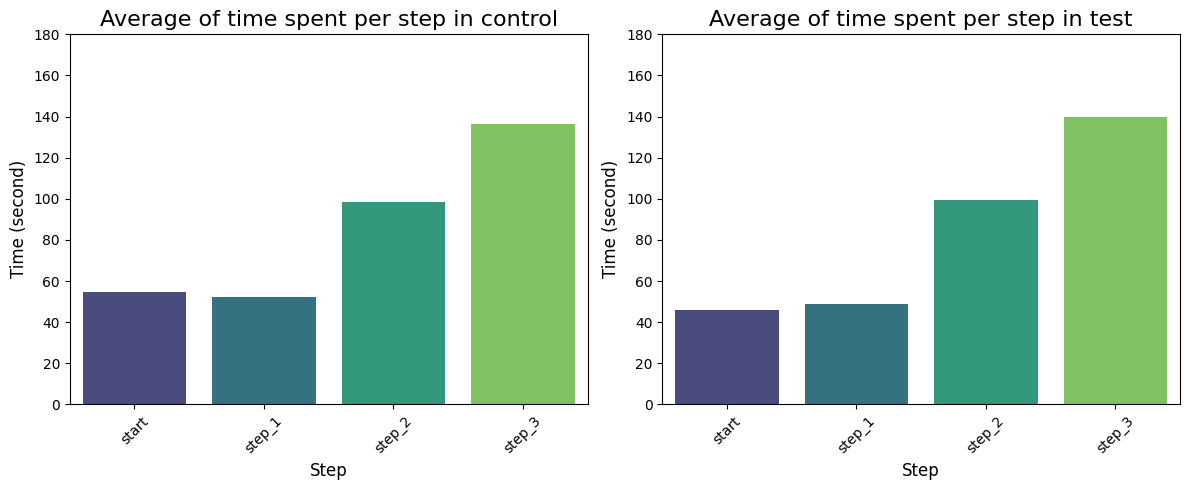

In [162]:
df_time_spent_control['time_spent_seconds'] = df_time_spent_control['time_spent'].dt.total_seconds()
df_time_spent_test['time_spent_seconds'] = df_time_spent_test['time_spent'].dt.total_seconds()


plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_control, palette='viridis')

plt.title('Average of time spent per step in control', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Time (second)', fontsize=12)
plt.ylim([0,180])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_test, palette='viridis')
plt.ylim([0,180])
plt.title('Average of time spent per step in test', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Time (second)', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()

plt.show()

In [163]:
df_time_spent_control['time_spent_seconds'].mean(), df_time_spent_test['time_spent_seconds'].mean()

(np.float64(85.5361158725), np.float64(83.41178154400001))

In [164]:
df_time_spent_control['time_spent_seconds'].median(), df_time_spent_test['time_spent_seconds'].median()

(np.float64(76.67660477199999), np.float64(74.1671692905))

In [165]:
df_avg_second_control['time_in_second'].mean(), df_avg_second_test['time_in_second'].mean()

(np.float64(86.83044705040493), np.float64(95.0499427386151))

In [166]:
df_avg_second_control['time_in_second'].median(), df_avg_second_test['time_in_second'].median()

(np.float64(78.06076574942041), np.float64(91.15968619689458))

## **Days 4 and 5**
1. Confirmed if the difference in completion rate of the new design and the old design is statistically significant. 
2. Carried out an analysis ensuring that the observed increase in completation rate from the A/B test meets or exceeds this 5% threshold.
3. Carried out another hypothesis test of your choosing. 
4. Evaluated the experiment by answering questions relating to: 
    - Design Effectiveness
    - Duration 
    - Additional Data Needs

In [167]:
df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])
df = f.no_repetition(df)

### 1. Confirmed if the difference in completetion rate of the new design and the old design is statistically significant. 

In [168]:
# Create a new column 'reached_confirm' that is True if user pass by 'confirm' step and False on the opposite case
df['reached_confirm'] = df['process_step'] == 'confirm'

# Filter DataFrame for groups "test" and "control"
df_test = df[df['Variation'] == 'Test']
df_control = df[df['Variation'] == 'Control']

# Create cross tab for  "test" group
contingency_test = pd.crosstab(df_test['visit_id'], df_test['reached_confirm'], 
                                rownames=['visit_id'], colnames=['reached_confirm'], 
                                margins=True, margins_name="Total")

# Create cross tab for "control" group
contingency_control = pd.crosstab(df_control['visit_id'], df_control['reached_confirm'], 
                                   rownames=['visit_id'], colnames=['reached_confirm'], 
                                   margins=True, margins_name="Total")

In [169]:
contingency_control

reached_confirm,False,True,Total
visit_id,,,
100030127_47967100085_936361,1,0,1
100037962_47432393712_705583,3,0,3
100057941_88477660212_944512,7,0,7
10006594_66157970412_679648,4,1,5
100071743_53464757454_616703,1,0,1
...,...,...,...
999890184_77121766521_746360,4,0,4
999936732_27995195904_324897,2,0,2
999951892_54774917180_163890,1,0,1


In [170]:
# Calculate the percentage of users who reached the confirmation step for each group
percent_test = contingency_test[True].sum() / contingency_test['Total'].sum() * 100
percent_control = contingency_control[True].sum() / contingency_control['Total'].sum() * 100

print(f"Percentage of 'Test' users who reached the confirmation step: {percent_test:.2f}%")
print(f"Percentage of 'Confirm' users who reached the confirmation step: {percent_control:.2f}%")

Percentage of 'Test' users who reached the confirmation step: 13.84%
Percentage of 'Confirm' users who reached the confirmation step: 12.69%


### Hypothesis: 
$$
H_0: \text{The completion rate is independent of the design. }
$$

$$
H_1: \text{The completion rate depends on the design. }
$$

The stadistic test is:

$$
Z = \frac{\overline{X} - \mu_0}{\sigma / \sqrt{n}}
$$

Where: 
- $\overline{X}$ is sample mean.
- $\mu_0$ hypothesized population mean.
- $\sigma$ std of the population.
- $n$ sample size.

In other words, if the completion rate is independent of the design means that the design does not affect the task completion rate. 


In [68]:
#Crear la tabla de contingencia para las variables 'Variation' y 'reached_confirm'
contingency_table_variation_confirm = pd.crosstab(df['Variation'], df['reached_confirm'], margins=True, margins_name="Total")
#Usar la funcion para comparar nuestra comparación de hipótesis.
result = f.chi_square_hypothesis(contingency_table_variation_confirm)
# Imprimir los resultados
print(result)
print("The use of either the variation test or the control affects the task completion rate")

{'chi2_statistic': np.float64(79.45728737655244), '\np_value': np.float64(2.269703986727495e-16), '\ndegrees_of_freedom': 4, '\nconclusion': 'Rechazamos la hipótesis nula. Las variables están asociadas.'}
The use of either the variation test or the control affects the task completion rate


### 2. Carried out an analysis ensuring that the observed increase in completation rate from the A/B test meets or exceeds this 5% threshold.

In [69]:
df_test = df[df['Variation'] == 'Test']
df_control = df[df['Variation'] == 'Control']
success_test = df_test[df_test['process_step'] == 'confirm'].shape[0]
success_control = df_control[df_control['process_step'] == 'confirm'].shape[0]

### Hypothesis: 
$$
H_0: \text{There is no significant difference in completion rates between the two groups. }
$$

$$
H_1: \text{There is a significant difference in completion rates. }
$$

The test stadistic is:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p}) \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

Where: 
- $\hat{p}_1, \hat{p}_2$: observed proportions of the two samples.
- $n_1, n_2$: sample sizes.
- $\hat{p}$: combined ratio under the null hypothesis, calculated as:

$$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
$$



In [70]:
total_test = df_test.shape[0]
total_control = df_control.shape[0]

counts = [success_test, success_control]
totals = [total_test, total_control]

stat, p_value = proportions_ztest(counts, totals)

success_rate_test = success_test / total_test
success_rate_control = success_control / total_control

(stat, p_value, success_rate_test, success_rate_control)

(np.float64(8.913881723275924),
 np.float64(4.927638778359979e-19),
 0.13836023142509135,
 0.12693090553355318)

### Hypothesis: 
$$
H_0: \text{There is no significant difference in completion rates between the two groups that meets or exceeds over 5\%}
$$

$$
H_1: \text{There is a 5\% significant difference in completion rates. }
$$

In [71]:
cumple, aumento, umbral = f.verificar_mejora_umbral(success_rate_test, success_rate_control)
if cumple:
    print(f"El aumento en la tasa de finalización ({aumento:.4f}) supera el umbral del 5% ({umbral:.4f}). El nuevo diseño se justifica.")
else:
    print(f"El aumento en la tasa de finalización ({aumento:.4f}) no supera el umbral del 5% ({umbral:.4f}). El nuevo diseño no se justifica económicamente.")

El aumento en la tasa de finalización (0.0114) supera el umbral del 5% (0.0063). El nuevo diseño se justifica.


### 3. Other hypothesis

### Hypothesis: 
$$
H_0: \mu_1 = \mu_2,
$$

$$
H_1: \mu_1 \neq \mu_2
$$

where $$\mu_1, \mu_2$$ are respectively the average age of customers interacting with each process (control and test)

The test stadistic is:

$$
t = \frac{\overline{X} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

Where: 
- $\overline{X}$ is sample mean.
- $\mu_0$ is hypothesized population mean.
- $s$ is std of the population.
- $n$ is the sample size.

In [72]:
t_stat, p_value, resultado = f.t_student(df_test, df_control, 'clnt_age')

print(f"Estadístico t: {t_stat}")
print(f"p-valor: {p_value}")
print(resultado)

Estadístico t: 6.966758281112878
p-valor: 3.2505966811818467e-12
Rechazamos la hipótesis nula: son significativamente diferentes.


### Hypothesis: 
$$
H_0: \text{Groups are balanced},
$$

$$
H_1: \text{Groups are not balanced}
$$



In [73]:
f.verificar_tamano_grupos(df)

Número de usuarios en el grupo Test: 157632
Número de usuarios en el grupo Control: 126754
Los grupos no están perfectamente balanceados. La diferencia es de 30878 usuarios.


(157632, 126754, 30878)

### Hypothesis: 
$$
H_0: \text{There is no significant difference in num\_accts between the two groups}
$$

$$
H_1: \text{There is a significant difference in num\_accts. }
$$

In [74]:
f.verificar_aleatorizacion(df, 'num_accts')

Estadístico t: -10.009715836107748
p-valor: 1.3948149842934956e-23
Hay diferencias significativas en la característica 'num_accts' entre los grupos.


(np.float64(-10.009715836107748), np.float64(1.3948149842934956e-23))

### Hypothesis: 
$$
H_0: \text{There is no significant difference in clnt\_age between the two groups}
$$

$$
H_1: \text{There is a significant difference in clnt\_age. }
$$

In [75]:
f.verificar_aleatorizacion(df, 'clnt_age')

Estadístico t: 6.966758281112878
p-valor: 3.2505966811818467e-12
Hay diferencias significativas en la característica 'clnt_age' entre los grupos.


(np.float64(6.966758281112878), np.float64(3.2505966811818467e-12))

### Hypothesis: 
$$
H_0: \text{There is no significant difference in bal between the two groups}
$$

$$
H_1: \text{There is a significant difference in bal. }
$$

In [76]:
f.verificar_aleatorizacion(df, 'bal')

Estadístico t: 1.1378404377109885
p-valor: 0.2551880779489641
No hay diferencias significativas en la característica 'bal' entre los grupos.


(np.float64(1.1378404377109885), np.float64(0.2551880779489641))

### Duration per step testing

In [171]:
df_time_spent_control
df_time_spent_control

,process_step,time_spent,time_spent_seconds
1,start,0 days 00:00:54.848932436,54.848932
2,step_1,0 days 00:00:52.164130678,52.164131
3,step_2,0 days 00:01:38.504277108,98.504277
4,step_3,0 days 00:02:16.627123268,136.627123


In [201]:

df_valid_control_time['time_in_second'] = df_valid_control_time['time_spent'].dt.total_seconds()
#df_valid_control_time.dropna(subset=['time_in_second'], inplace= True)
df_valid_control_time['time_in_second'] = df_valid_control_time['time_spent'].apply(lambda x: x.total_seconds() if x.total_seconds() > 0 else 0)
df_valid_control_time

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,Variation,visitor_id,visit_id,process_step,date_time,step_order,previous_step_order,is_error,time_spent,time_in_second
281168,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,Control,446844663_31615102958,795373564_99931517312_810896,start,2017-04-08 18:05:02,0,NaN,False,0 days 00:00:11,11.0
281167,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,Control,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,1,0.0,False,0 days 00:00:11,11.0
281843,1195,21.0,262.0,54.5,M,2,28457.96,2.0,5.0,boomers,...,Control,766842522_69992551638,393817425_39015278493_996341,start,2017-04-05 20:15:26,0,NaN,False,0 days 00:00:33,33.0
281842,1195,21.0,262.0,54.5,M,2,28457.96,2.0,5.0,boomers,...,Control,766842522_69992551638,393817425_39015278493_996341,step_1,2017-04-05 20:15:59,1,0.0,False,0 days 00:01:38,98.0
281841,1195,21.0,262.0,54.5,M,2,28457.96,2.0,5.0,boomers,...,Control,766842522_69992551638,393817425_39015278493_996341,step_2,2017-04-05 20:17:37,2,1.0,False,0 days 00:00:31,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213615,9997470,6.0,82.0,36.0,U,2,53543.03,0.0,3.0,millennials,...,Control,395791369_55562604618,761490147_96352537762_21814,step_3,2017-05-09 16:39:16,3,2.0,False,0 days 00:00:18,18.0
141089,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,Control,292425655_16607136645,189177304_69869411700_783154,start,2017-03-29 15:25:00,0,NaN,False,0 days 00:04:55,295.0
141083,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,Control,292425655_16607136645,189177304_69869411700_783154,step_1,2017-03-29 15:29:55,1,0.0,False,0 days 00:00:16,16.0
141082,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,Control,292425655_16607136645,189177304_69869411700_783154,step_2,2017-03-29 15:30:11,2,1.0,False,0 days 00:07:17,437.0


In [ ]:
df_valid_test_time['time_in_second'] = df_valid_test_time['time_spent'].dt.total_seconds()
#df_valid_test_time.dropna(subset=['time_in_second'], inplace= True)
df_valid_test_time['time_in_second'] = df_valid_test_time['time_spent'].apply(lambda x: x.total_seconds() if x.total_seconds() > 0 else 0)
df_valid_test_time

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,Variation,visitor_id,visit_id,process_step,date_time,step_order,previous_step_order,is_error,time_spent,time_in_second
252082,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,0,NaN,False,0 days 00:00:07,7.0
252081,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,1,0.0,False,0 days 00:00:32,32.0
252080,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2,1.0,False,0 days 00:01:39,99.0
252079,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3,2.0,False,0 days 00:00:20,20.0
9543,647,12.0,151.0,57.5,M,2,30525.80,0.0,4.0,boomers,...,Test,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,0,NaN,False,0 days 00:00:07,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306141,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,Test,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,1,0.0,False,0 days 00:00:10,10.0
306140,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,Test,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,2,1.0,False,0 days 00:00:39,39.0
306139,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,Test,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,3,2.0,False,0 days 00:00:21,21.0
306133,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,0,NaN,False,0 days 00:00:15,15.0


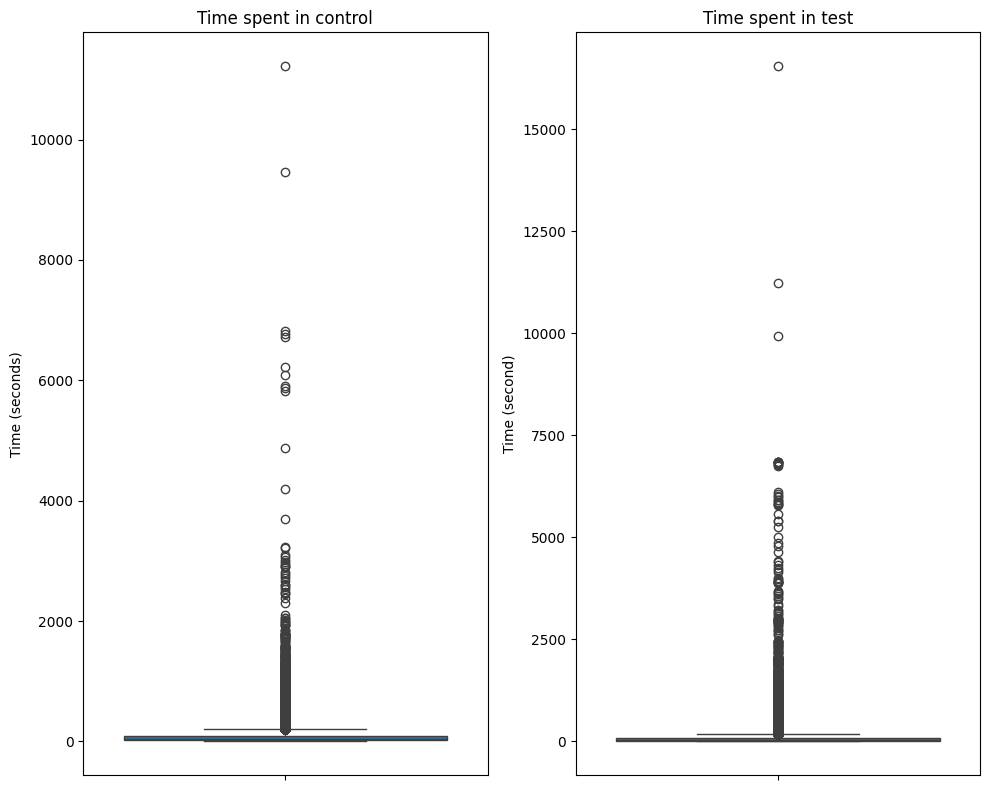

In [184]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y='time_in_second', data=df_valid_control_time)
plt.title('Time spent in control')
plt.ylabel('Time (seconds)')
plt.subplot(1,2,2)
sns.boxplot(y='time_in_second', data=df_valid_test_time)
plt.title('Time spent in test')
plt.ylabel('Time (second)')

plt.tight_layout()
plt.show()


In [81]:
steps = df_valid_control_time['process_step'].unique().tolist()

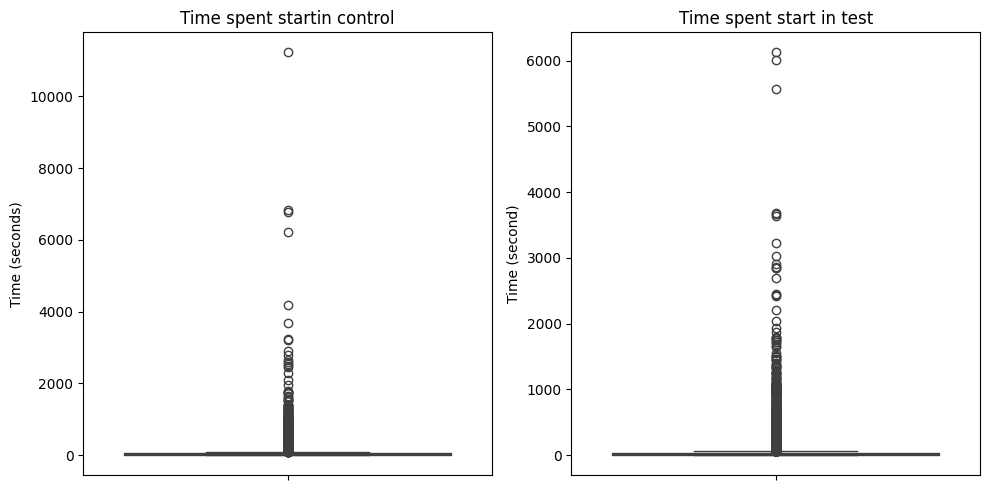

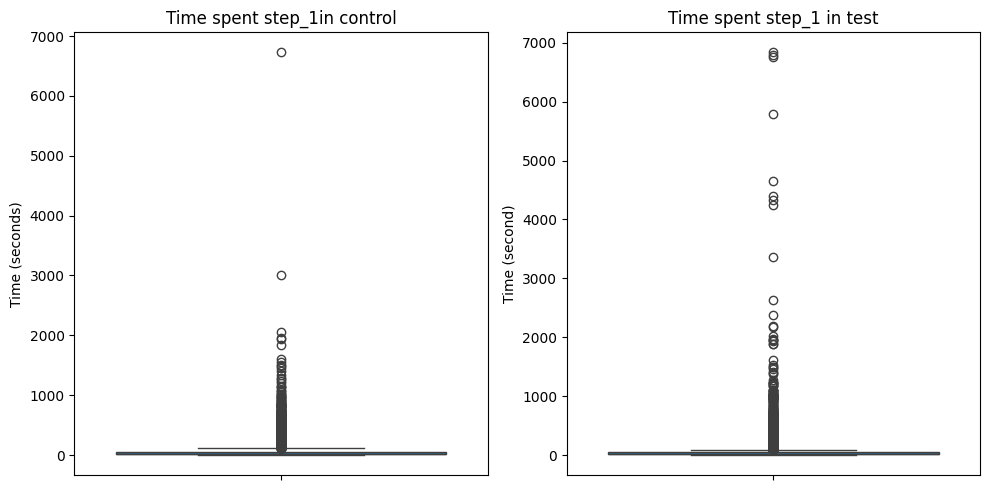

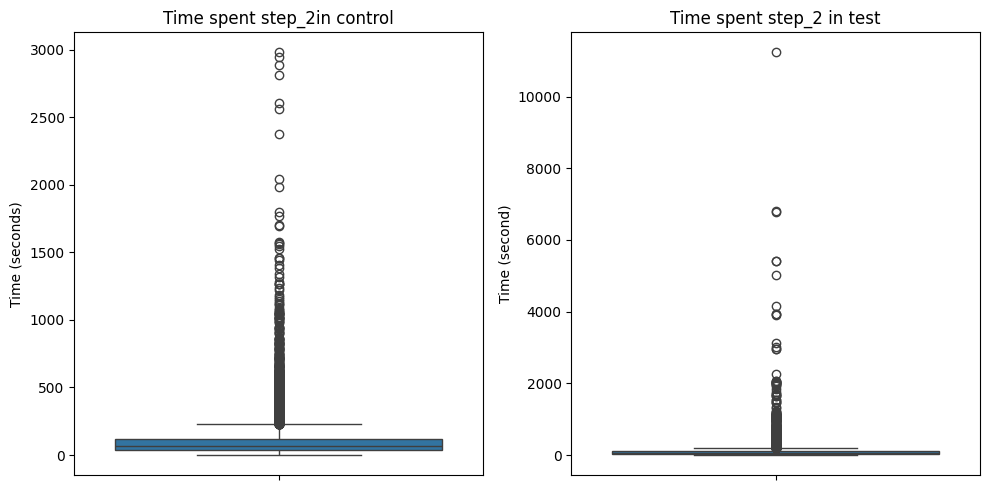

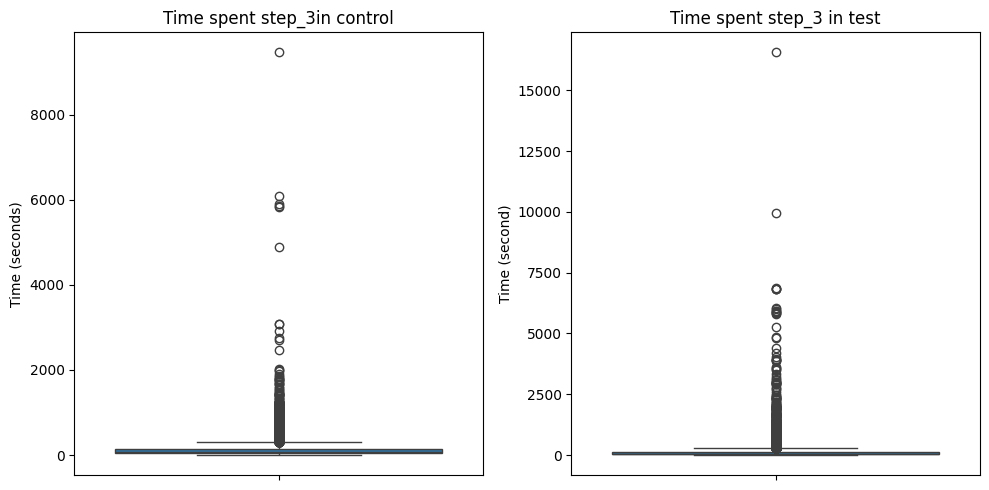

In [185]:
steps = df_valid_control_time['process_step'].unique().tolist()[:4]


for i in steps:

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(y='time_in_second', data=df_valid_control_time[df_valid_control_time['process_step'] == i])
    plt.title(f'Time spent {i}in control')
    plt.ylabel('Time (seconds)')
    plt.subplot(1,2,2)
    sns.boxplot(y='time_in_second', data=df_valid_test_time[df_valid_test_time['process_step'] == i])
    plt.title(f'Time spent {i} in test')
    plt.ylabel('Time (second)')

    plt.tight_layout()
    plt.show()

In [186]:
df_valid_test_time['time_in_second'].describe()

count    80933.000000
mean        80.304659
std        214.496615
min          0.000000
25%         14.000000
50%         35.000000
75%         79.000000
max      16552.000000
Name: time_in_second, dtype: float64

In [187]:
df_valid_control_time['time_in_second'].describe()

count    69649.000000
mean        81.854327
std        165.641143
min          0.000000
25%         15.000000
50%         41.000000
75%         89.000000
max      11221.000000
Name: time_in_second, dtype: float64

Remove outliers

In [188]:
df_time_control_no_outliers = f.remove_outliers(df_valid_control_time, 'time_in_second')
df_time_test_no_outliers = f.remove_outliers(df_valid_test_time, 'time_in_second')

Lower Bound: -96.0
Upper Bound: 200.0
Lower Bound: -83.5
Upper Bound: 176.5


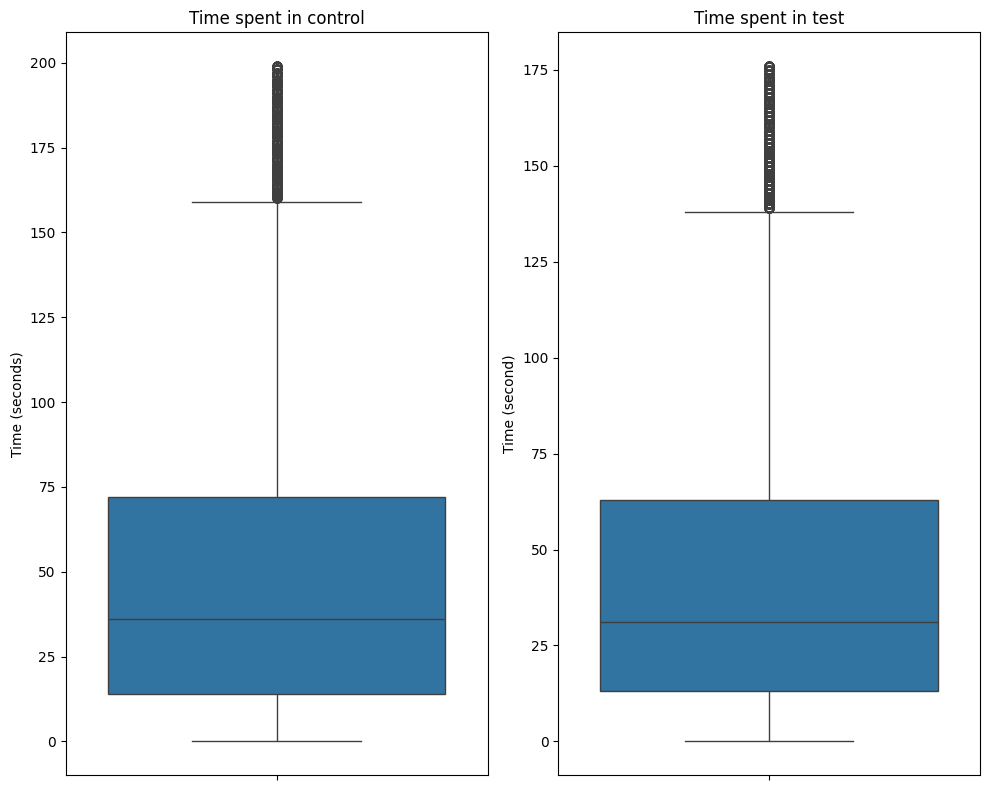

In [189]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y='time_in_second', data=df_time_control_no_outliers)
plt.title('Time spent in control')
plt.ylabel('Time (seconds)')
plt.subplot(1,2,2)
sns.boxplot(y='time_in_second', data=df_time_test_no_outliers)
plt.title('Time spent in test')
plt.ylabel('Time (second)')

plt.tight_layout()
plt.show()

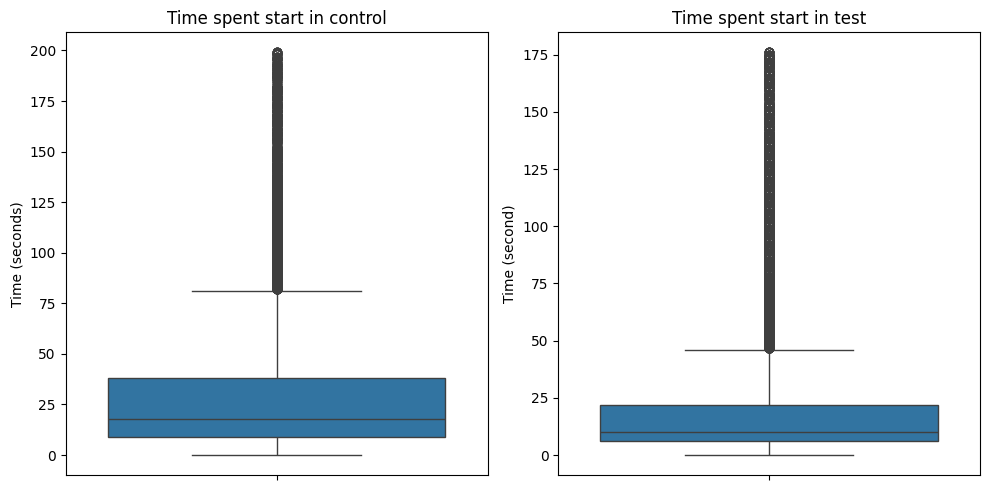

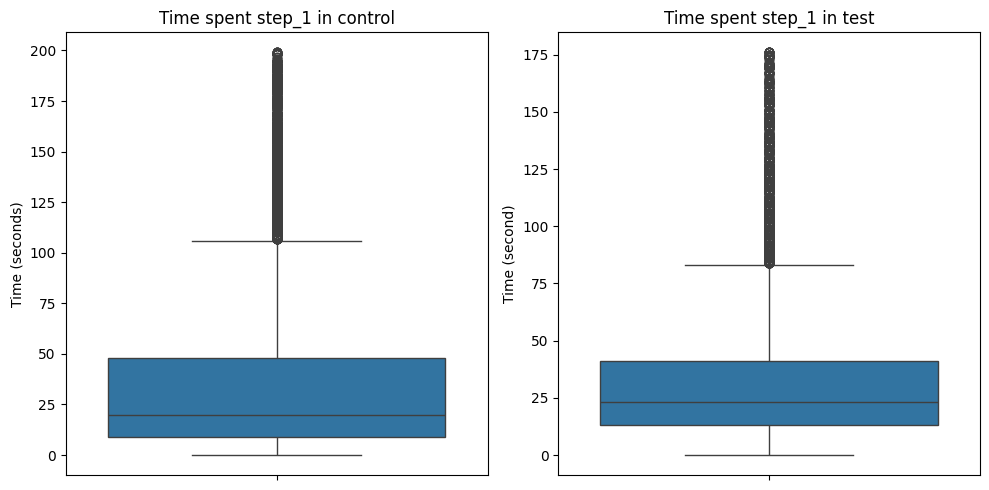

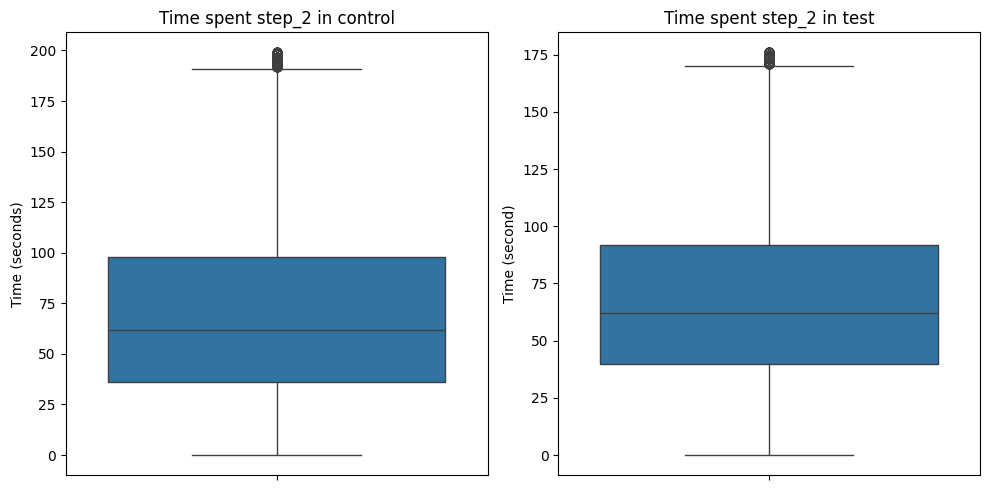

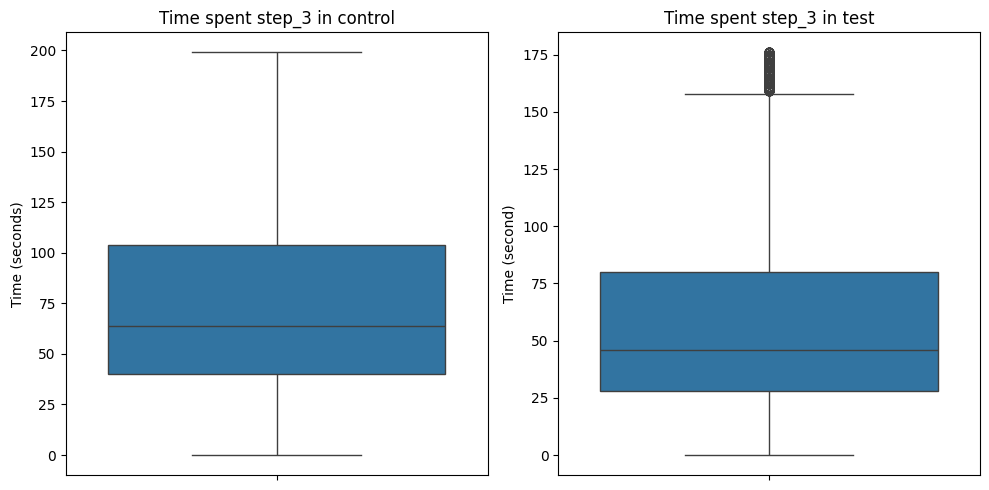

In [190]:
steps = ['start', 'step_1', 'step_2', 'step_3']

for i in steps:

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(y='time_in_second', data=df_time_control_no_outliers[df_time_control_no_outliers['process_step'] == i])
    plt.title(f'Time spent {i} in control')
    plt.ylabel('Time (seconds)')
    plt.subplot(1,2,2)
    sns.boxplot(y='time_in_second', data=df_time_test_no_outliers[df_time_test_no_outliers['process_step'] == i])
    plt.title(f'Time spent {i} in test')
    plt.ylabel('Time (second)')

    plt.tight_layout()
    plt.show()

In [191]:
# create series with control and test step_time 
time_test = df_time_test_no_outliers['time_in_second']
time_control = df_time_control_no_outliers['time_in_second']

In [192]:
time_test.describe()

count    73619.000000
mean        43.507057
std         39.352199
min          0.000000
25%         13.000000
50%         31.000000
75%         63.000000
max        176.000000
Name: time_in_second, dtype: float64

In [193]:
time_control.describe()

count    63654.000000
mean        49.893094
std         45.106591
min          0.000000
25%         14.000000
50%         36.000000
75%         72.000000
max        199.000000
Name: time_in_second, dtype: float64

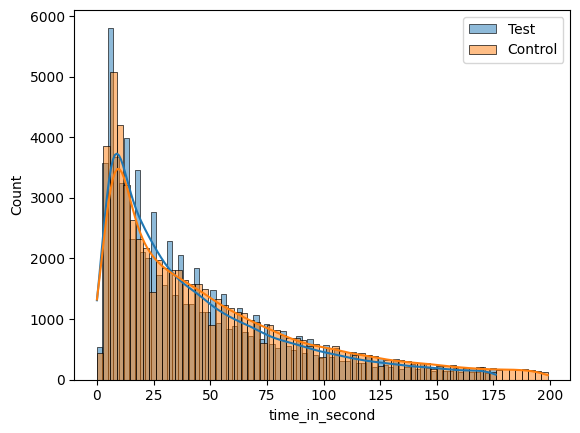

In [194]:
sns.histplot(time_test, kde=True, label='Test')
sns.histplot(time_control, kde=True, label='Control')
plt.legend()
plt.show()

In [195]:
time_test[time_test == 0]

235622    0.0
85616     0.0
189763    0.0
50779     0.0
266671    0.0
266672    0.0
315030    0.0
279559    0.0
14264     0.0
154789    0.0
230701    0.0
301481    0.0
75012     0.0
237153    0.0
276508    0.0
276607    0.0
61125     0.0
193277    0.0
47373     0.0
122054    0.0
192190    0.0
22084     0.0
45734     0.0
268604    0.0
316651    0.0
116461    0.0
61802     0.0
168911    0.0
160631    0.0
252902    0.0
113008    0.0
87925     0.0
59040     0.0
54067     0.0
54066     0.0
212358    0.0
282830    0.0
97423     0.0
264337    0.0
253682    0.0
217037    0.0
101455    0.0
111357    0.0
283396    0.0
97871     0.0
295229    0.0
31692     0.0
294656    0.0
121279    0.0
136411    0.0
139146    0.0
300574    0.0
141025    0.0
31655     0.0
153036    0.0
173482    0.0
265282    0.0
Name: time_in_second, dtype: float64

<Axes: ylabel='Count'>

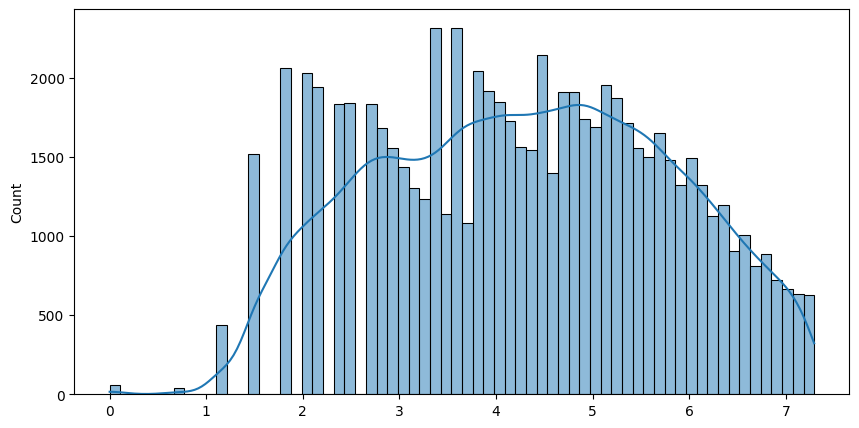

In [196]:
from scipy.stats import boxcox
import numpy as np

if np.any(time_test <= 0):
    offset = abs(min(time_test)) + 1
    time_test = time_test + offset

# Applying Box-Cox transformation to 'LotArea'
time_test, _ = boxcox(time_test)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'LotArea'
sns.histplot(time_test, kde=True)

<Axes: ylabel='Count'>

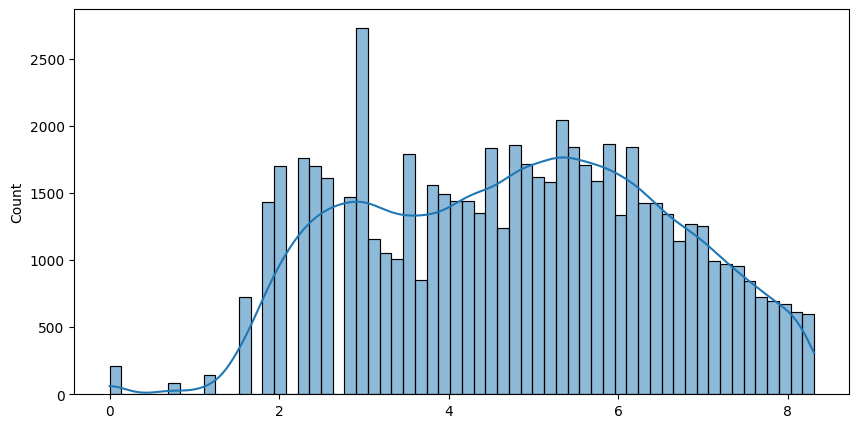

In [197]:
from scipy.stats import boxcox
import numpy as np

if np.any(time_control <= 0):
    offset = abs(min(time_test)) + 1
    time_control = time_control + offset

# Applying Box-Cox transformation to 'LotArea'
time_control, _ = boxcox(time_control)

# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Box-Cox transformed 'LotArea'
sns.histplot(time_control, kde=True)

## Últimos pasos

In [198]:
df_valid_control_time[['client_id', 'visit_id', 'process_step', 'time_spent']]

,client_id,visit_id,process_step,time_spent
281168,1186,795373564_99931517312_810896,start,0 days 00:00:11
281167,1186,795373564_99931517312_810896,step_1,0 days 00:00:11
281843,1195,393817425_39015278493_996341,start,0 days 00:00:33
281842,1195,393817425_39015278493_996341,step_1,0 days 00:01:38
281841,1195,393817425_39015278493_996341,step_2,0 days 00:00:31
...,...,...,...,...
213615,9997470,761490147_96352537762_21814,step_3,0 days 00:00:18
141089,9998346,189177304_69869411700_783154,start,0 days 00:04:55
141083,9998346,189177304_69869411700_783154,step_1,0 days 00:00:16
141082,9998346,189177304_69869411700_783154,step_2,0 days 00:07:17


In [199]:
df_valid_control_time.isna().sum()

client_id                  0
clnt_tenure_yr             0
clnt_tenure_mnth           0
clnt_age                   0
gendr                      0
num_accts                  0
bal                        0
calls_6_mnth               0
logons_6_mnth              0
generation                 0
testing_engagement         0
balance_level              0
tenure                     0
Variation                  0
visitor_id                 0
visit_id                   0
process_step               0
date_time                  0
step_order                 0
previous_step_order    20970
is_error                   0
time_spent                 0
time_in_second             0
dtype: int64

In [200]:
df_valid_control_time.isnull()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,Variation,visitor_id,visit_id,process_step,date_time,step_order,previous_step_order,is_error,time_spent,time_in_second
281168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
281167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281843,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
281842,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
281841,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141089,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
141083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
df_control_steps_final = df_valid_control_time[df_valid_control_time['time_spent'].isnull()].groupby(by='process_step').agg('count').reset_index()[['process_step','visit_id']].rename(columns={'visit_id':'number_of_visits'}).sort_values(by='process_step')

In [193]:
df_control_steps_final

,process_step,number_of_visits
0,confirm,15911
1,start,7567
2,step_1,3477
3,step_2,2007
4,step_3,2973


In [188]:
df_test_steps_final = df_valid_test_time[df_valid_test_time['time_spent'].isnull()].groupby(by='process_step').agg('count').reset_index()[['process_step','visit_id']].rename(columns={'visit_id':'number_of_visits'}).sort_values(by='process_step')
df_test_steps_final

,process_step,number_of_visits
0,confirm,21566
1,start,5078
2,step_1,3874
3,step_2,2508
4,step_3,3698


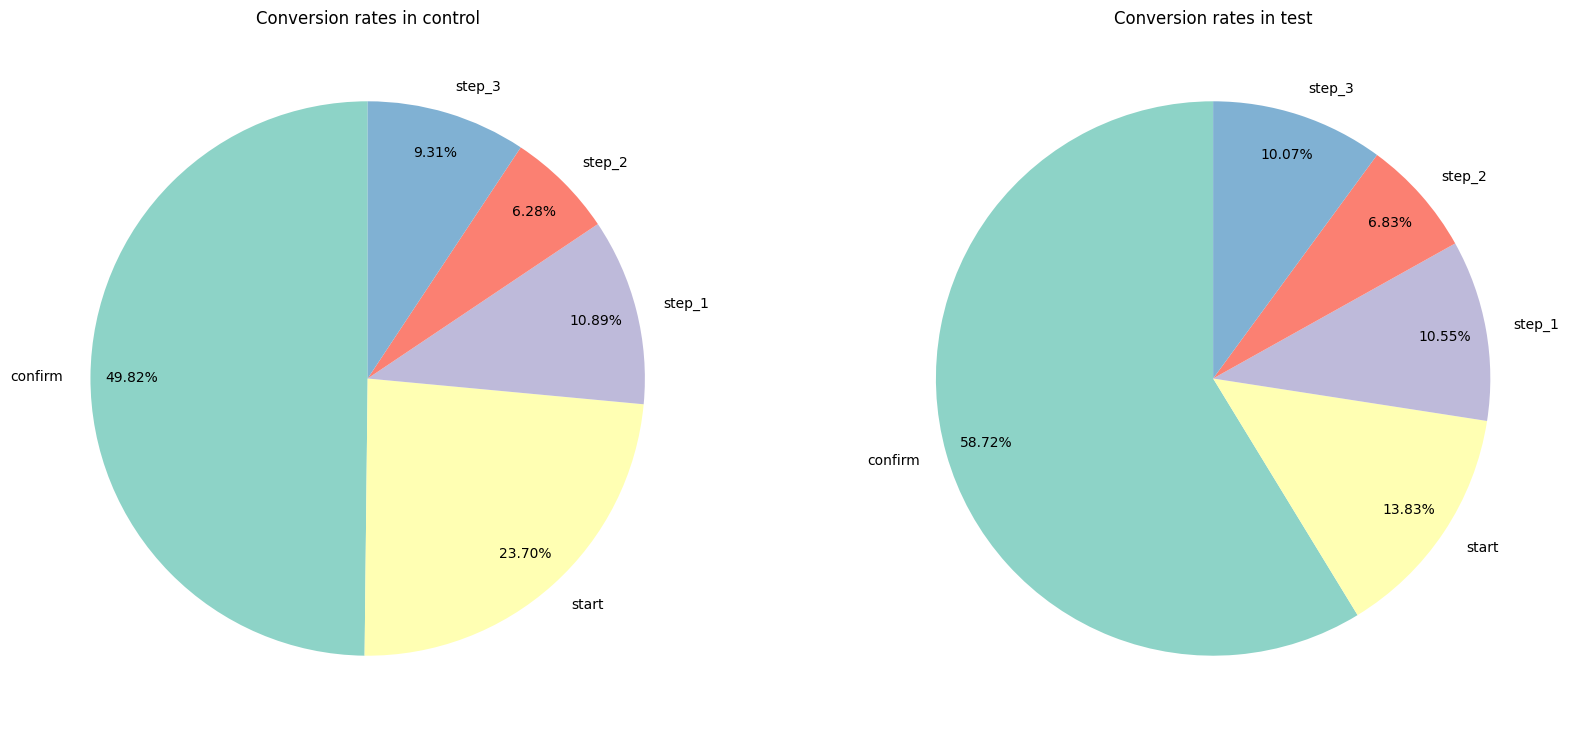

In [203]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.pie(df_control_steps_final['number_of_visits'], labels = df_control_steps_final['process_step'],autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85)
plt.title('Conversion rates in control')
#plt.show()
#plt.figure(figsize=(20,9))
plt.subplot(1,2,2)
plt.pie(df_test_steps_final['number_of_visits'], labels = df_test_steps_final['process_step'], autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85 )
plt.title('Conversion rates in test')
plt.show()

### Hypothesis: 
$$
H_0: \mu_{control} = \mu_{test},
$$

$$
H_1: \mu_{control} \neq \mu_{test}
$$



The test stadistic is:

$$
t = \frac{\overline{X} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

Where: 
- $\overline{X}$ is sample mean.
- $\mu_0$ is hypothesized population mean.
- $s$ is std of the population.
- $n$ is the sample size.

In [228]:
mu_control = df_avg_second_control['time_in_second'].mean()
mu_test = df_avg_second_test['time_in_second'].mean()
me_control = df_avg_second_control['time_in_second'].median()
me_test = df_avg_second_test['time_in_second'].median()

In [229]:
f.t_student(df_avg_second_control, df_avg_second_test, 'time_in_second')

(np.float64(0.06681086225550063),
 np.float64(0.9490424043727508),
 'No rechazamos la hipótesis nula: no hay diferencia significativa.')